### Problem Statement   
---
*   How to better stock the items they sell

### Performance Measure
---
The evaluation metric for this Project is AUC (area under the curve). The AUC (Area Under Curve) is the area enclosed by the ROC curve. A perfect classifier has AUC = 1 and a completely random classifier has AUC = 0.5. Hence, this classification project will be evaluated as a good predictive if the AUC will be closer to 1.

### Data description
sku -sku code   
national_inv- Current inventory level of component  
lead_time -Transit time     
in_transit_qtry - Quantity in transit   
forecast_x_month - Forecast sales for the net 3, 6, 9 months    
sales_x_month - Sales quantity for the prior 1, 3, 6, 9 months      
min_bank - Minimum recommended amount in stock      
potential_issue - Indictor variable noting potential issue with item    
pieces_past_due - Parts overdue from source     
perf_x_months_avg - Source performance in the last 6 and 12 months      
local_bo_qty - Amount of stock orders overdue       
X17-X22 - General Risk Flags    
went_on_back_order - Product went on backorder      
Validation - indicator variable for training (0), validation (1), and test set (2)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.2)

In [2]:
train_data = pd.read_csv("/home/miki/Desktop/Docker/iNeuron/backorder-prediction/data/Kaggle_Training_Dataset_v2.csv")

/tmp/ipykernel_53926/3471036416.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("/home/miki/Desktop/Docker/iNeuron/backorder-prediction/data/Kaggle_Training_Dataset_v2.csv")


In [3]:
train_data.head(5)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [4]:
test_data = pd.read_csv("/home/miki/Desktop/Docker/iNeuron/backorder-prediction/data/Kaggle_Test_Dataset_v2.csv")

/tmp/ipykernel_53926/2822150164.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv("/home/miki/Desktop/Docker/iNeuron/backorder-prediction/data/Kaggle_Test_Dataset_v2.csv")


In [5]:
test_data.head(5)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


In [6]:
# combining of the train and test set for data preprocessing
df = pd.concat([train_data, test_data])

In [7]:
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [8]:
df.shape

(1929937, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929937 entries, 0 to 242075
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sku                object 
 1   national_inv       float64
 2   lead_time          float64
 3   in_transit_qty     float64
 4   forecast_3_month   float64
 5   forecast_6_month   float64
 6   forecast_9_month   float64
 7   sales_1_month      float64
 8   sales_3_month      float64
 9   sales_6_month      float64
 10  sales_9_month      float64
 11  min_bank           float64
 12  potential_issue    object 
 13  pieces_past_due    float64
 14  perf_6_month_avg   float64
 15  perf_12_month_avg  float64
 16  local_bo_qty       float64
 17  deck_risk          object 
 18  oe_constraint      object 
 19  ppap_risk          object 
 20  stop_auto_buy      object 
 21  rev_stop           object 
 22  went_on_backorder  object 
dtypes: float64(15), object(8)
memory usage: 353.4+ MB


In [10]:
df.isnull().sum()

sku                       0
national_inv              2
lead_time            115619
in_transit_qty            2
forecast_3_month          2
forecast_6_month          2
forecast_9_month          2
sales_1_month             2
sales_3_month             2
sales_6_month             2
sales_9_month             2
min_bank                  2
potential_issue           2
pieces_past_due           2
perf_6_month_avg          2
perf_12_month_avg         2
local_bo_qty              2
deck_risk                 2
oe_constraint             2
ppap_risk                 2
stop_auto_buy             2
rev_stop                  2
went_on_backorder         2
dtype: int64

In [11]:
pd.DataFrame({"Missing Values (%)": df.isnull().sum()/len(df.index)*100})

,Missing Values (%)
sku,0.000000
national_inv,0.000104
lead_time,5.990817
in_transit_qty,0.000104
forecast_3_month,0.000104
forecast_6_month,0.000104
forecast_9_month,0.000104
sales_1_month,0.000104
sales_3_month,0.000104
sales_6_month,0.000104


In [12]:
# are there any duplicated columns and rows
df.duplicated().sum()

0

In [13]:
df[df.duplicated()]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder


In [14]:
df = df.loc[:,~df.columns.duplicated(keep='first')]

In [15]:
# df.reset_index(inplace=True)

In [16]:
df.shape

(1929937, 23)

### Data summary and Exploration
---

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1929935.0,496.568259,29573.434344,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1814318.0,7.878627,7.054212,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1929935.0,43.064397,1295.420493,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1929935.0,178.539864,5108.770174,0.0,0.00,0.00,4.00,1510592.0
forecast_6_month,1929935.0,345.465893,9831.562085,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1929935.0,506.606748,14345.430866,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1929935.0,55.368164,1884.377009,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1929935.0,174.663858,5188.855852,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1929935.0,341.565349,9585.030376,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1929935.0,523.577094,14733.265629,0.0,0.00,4.00,47.00,3205172.0


In [18]:
df = df.loc[:,~df.columns.duplicated(keep='first')]

In [19]:
df = df.drop(columns = ["sku"])

In [20]:
# separate categorical from numerical columns
cat = [cat for cat in df.columns if df[cat].dtypes == 'O']
num =  df.select_dtypes(include=np.number).columns
cata =  df.select_dtypes(exclude=np.number).columns

In [21]:
cat_col = df.select_dtypes(exclude=np.number).columns

In [22]:
cat 

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [23]:
num

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

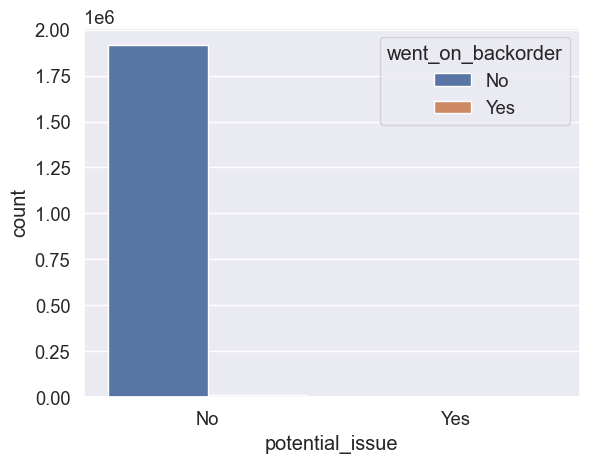

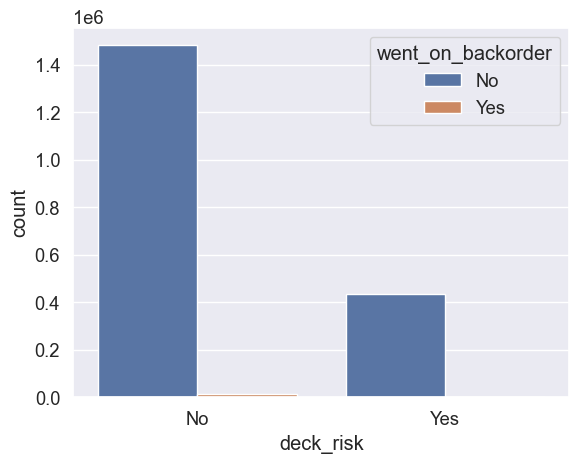

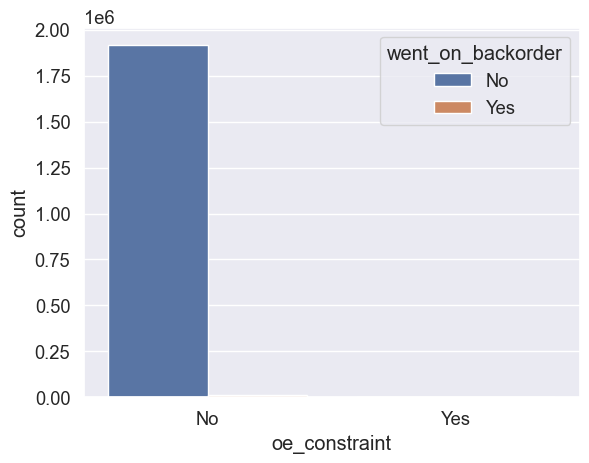

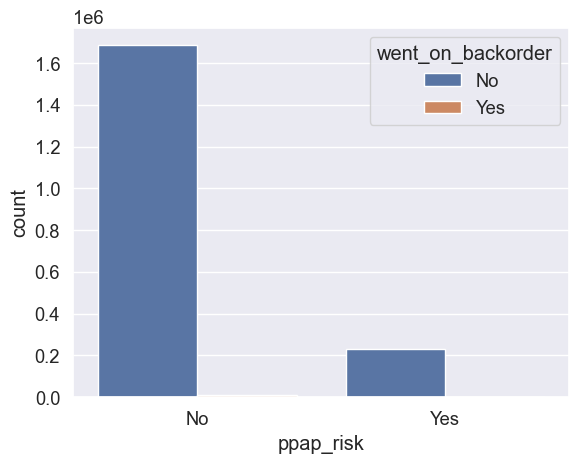

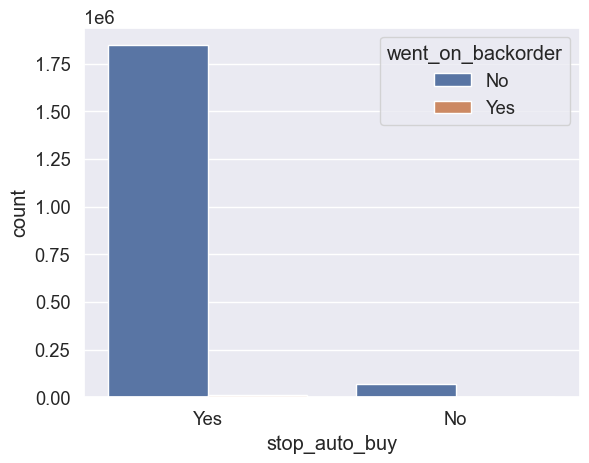

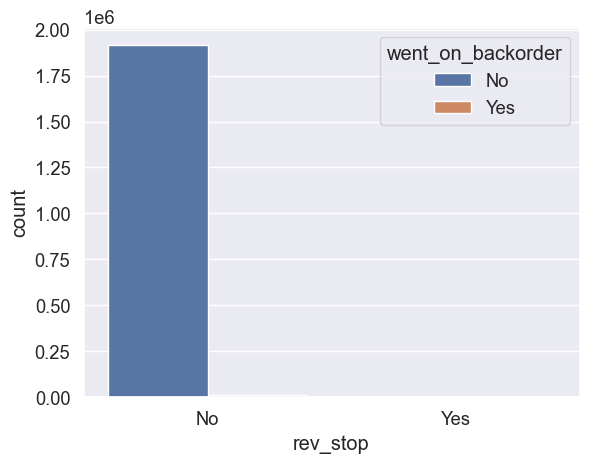

In [24]:
import matplotlib.pyplot as plt
for cols in cat:
    if cols != "went_on_backorder":
        sns.countplot(x=cols, data = df, hue= "went_on_backorder")
        plt.show()

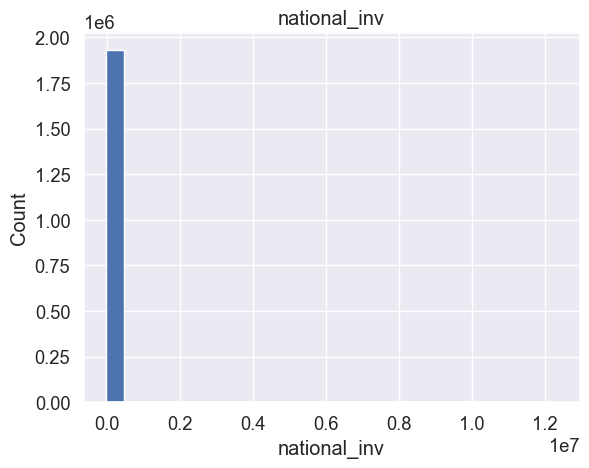

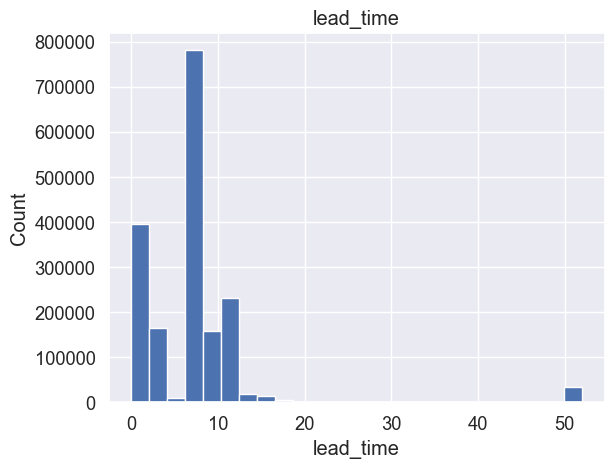

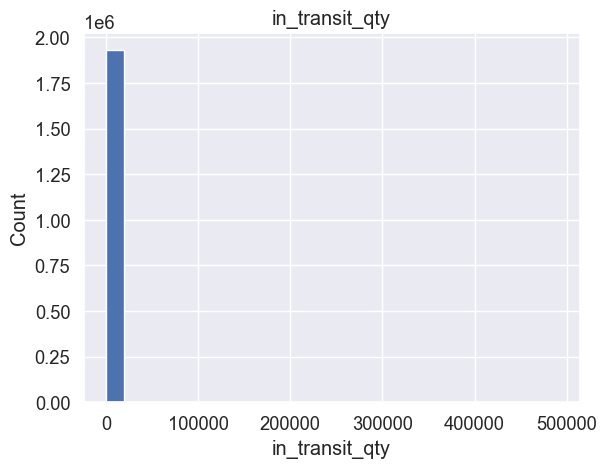

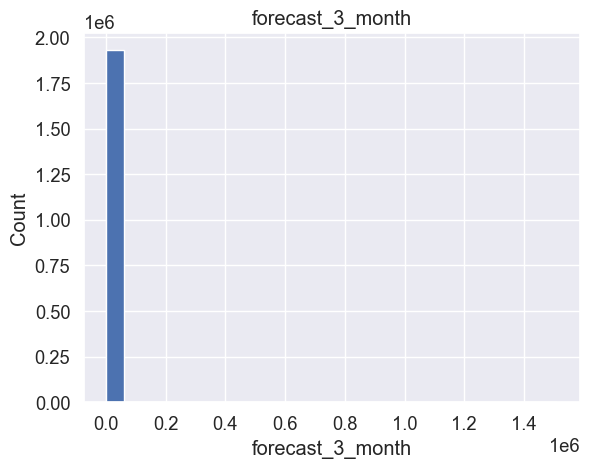

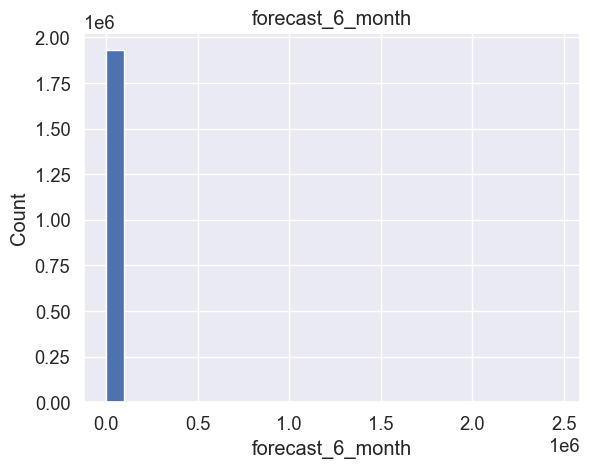

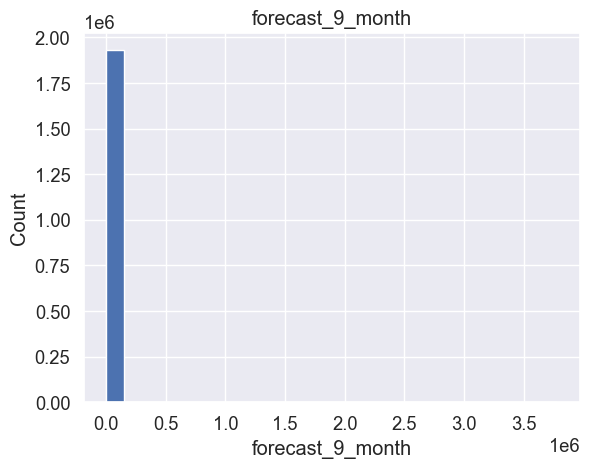

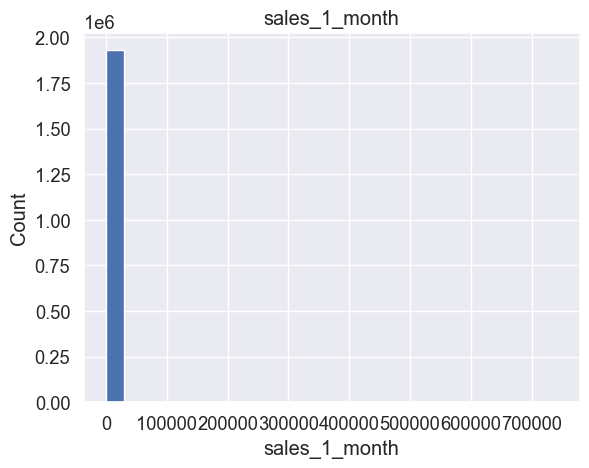

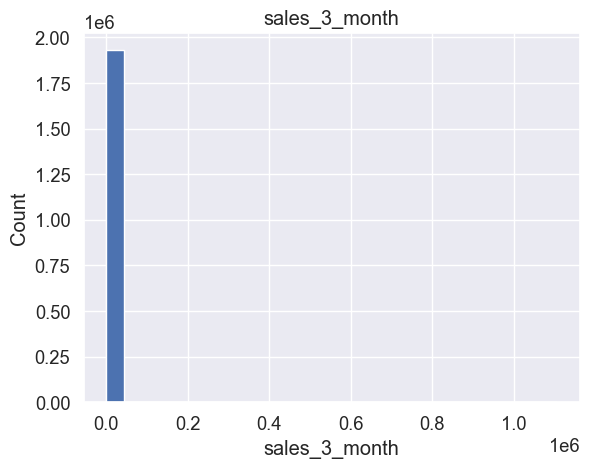

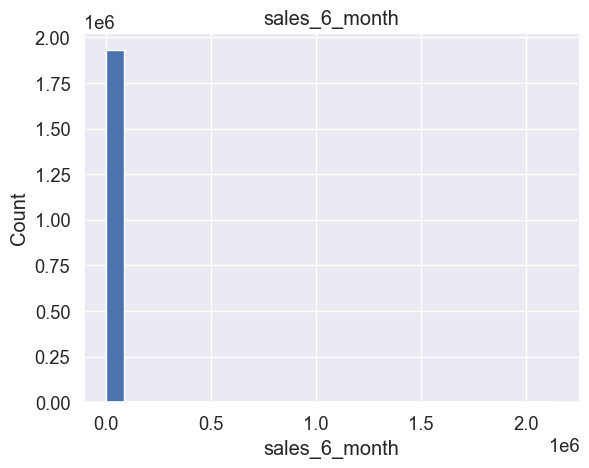

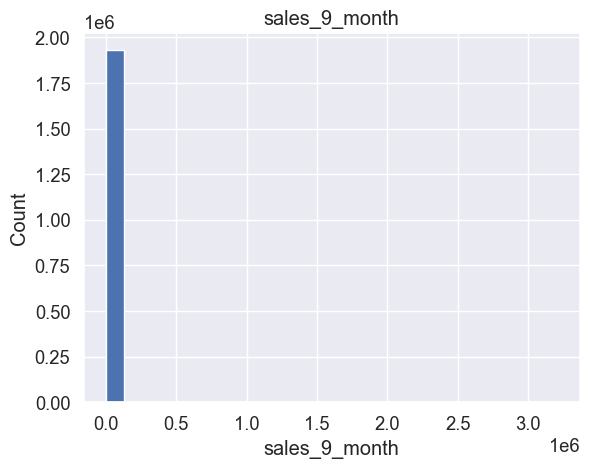

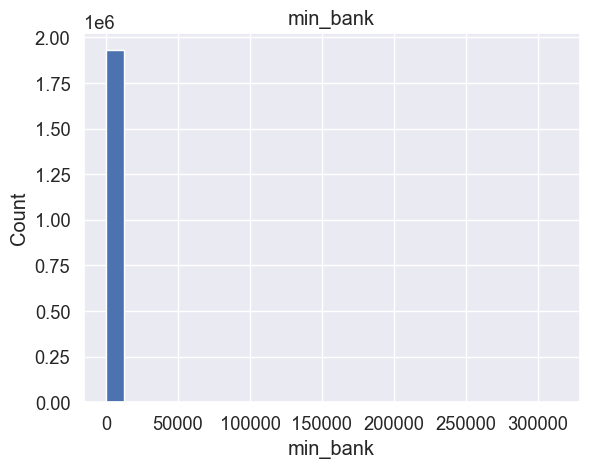

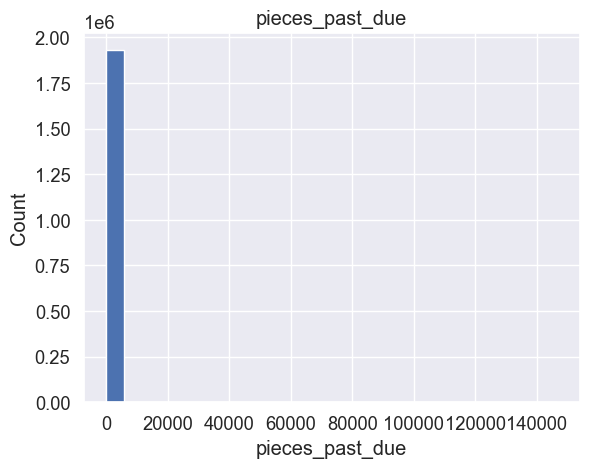

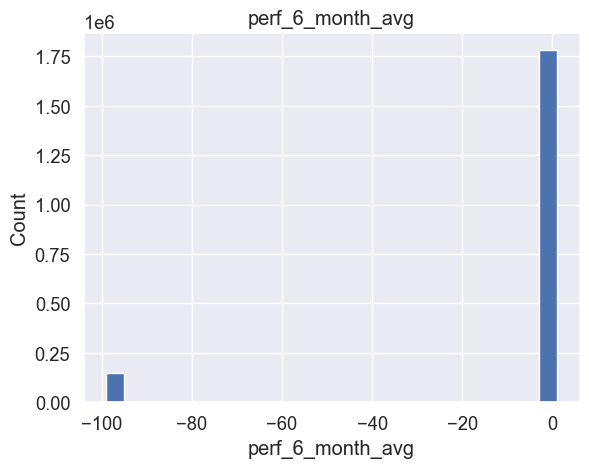

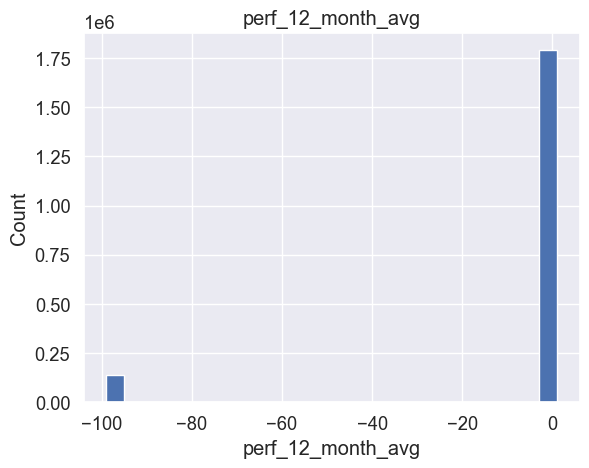

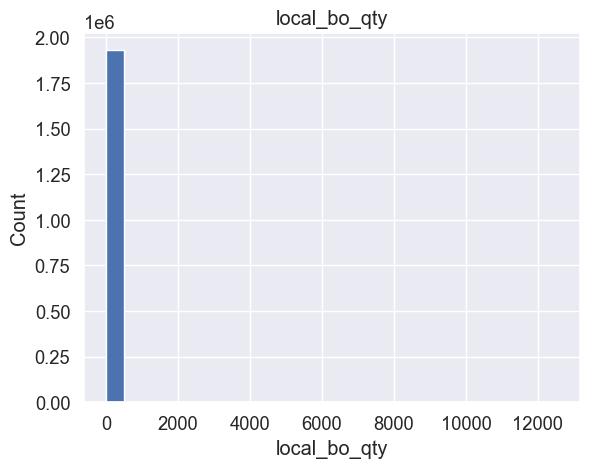

In [25]:
for feature in num:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Insights
---

-   Fearures are highly skewed which indicate the presence of outliers
-   Missing values are also indicated 
-   Conversion of some categorical variables are also important